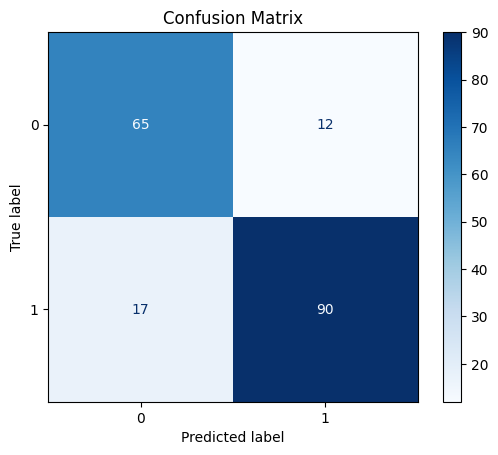

Negative Log Likelihood Loss: 0.5682068716714531
Accuracy: 0.842391304347826
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.79      0.84      0.82        77
   Heart Disease       0.88      0.84      0.86       107

        accuracy                           0.84       184
       macro avg       0.84      0.84      0.84       184
    weighted avg       0.84      0.84      0.84       184

Negative Log Likelihood Loss: 0.31634511008107585


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, log_loss
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/mwardeh-png/Intro-to-ML/main/heart%20(1).csv'
data = pd.read_csv(file_path)

# Preparing the data for modeling
# Encoding categorical features
label_encoders = {}
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting data into features and target variable
X = data.drop(columns='HeartDisease')
y = data['HeartDisease']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=["No Heart Disease", "Heart Disease"])
conf_matrix = confusion_matrix(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Displaying the loss (negative log likelihood)
print(f"Negative Log Likelihood Loss: {loss}")

# Displaying the classification report and accuracy
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)



In [ ]:
loss

0.6880108991825613

# Draft